In [17]:
import pickle
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import pyLDAvis.gensim
import numpy as np
import numpy as np; np.random.seed(0)
import seaborn as sns
import os
from matplotlib import pyplot as plt
import re


In [52]:
# Global variables
read_version_number = "16"
version_number = "27"
senti = "_neg"
time_window = 7
number_topics = 10
window_slice = 18
results_dir = "results/"
grid_dir = 'grid/'
topic_models_dir = 'topic_models/'




In [53]:
topic_model = pickle.load(open('topic_models/topic_model_V{}{}_tw{}_nt{}_slice{}'.format(version_number, senti, time_window, number_topics, window_slice), 'rb'))
# topic_model = pickle.load(open('topic_models/topic_model_V' + version_number + senti + '_tw'28_nt16_slice26, 'rb'))


# corpus = pickle.load(open('corpusses/corpus_V' + version_number + senti, 'rb'))
# id2word = pickle.load(open('dictionaries/dictionary_V' + version_number + senti, 'rb'))

print(topic_model)
# print(df['tokenized_tweets'])

# Load tokenized tweets for Coherence Score
# df = pickle.load(open(results_dir + 'set_results_V' + version_number, 'rb'))

# Filtering for words
words = [re.findall(r'"([^"]*)"', t[1]) for t in topic_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics):
    print(f"------ Topic {id+1} ------")
    print(t, end="\n\n")

LdaModel(num_terms=7531, num_topics=10, decay=0.5, chunksize=2000)
------ Topic 1 ------
boer stikstofcrisi wel houden politiek moeten land weer protest groot

------ Topic 2 ------
boer agractie den haag weg chaos tractor boeren kabinet stikstofcrisi

------ Topic 3 ------
boer boeren boerenopstand komen wel agractie jesseklaver moeten uitstoot zien

------ Topic 4 ------
boer den weer haag wel vandaag zeggen weg denken jullie

------ Topic 5 ------
boer komen stikstofcrisi agractie boeren staan laten malieveld ander weg

------ Topic 6 ------
boer den haag malieveld laten boeren agractie boerenopstand staan tractor

------ Topic 7 ------
boer stikstofcrisi jaar boeren wel allemaal crisis klimaat ander laten

------ Topic 8 ------
boer den wel jesseklaver haag jaar boeren zien alleen onze

------ Topic 9 ------
boer nederland boeren politie agractie wel moeten vinden jullie mens

------ Topic 10 ------
boer komen jullie wel zeggen boeren alleen laten weten waar



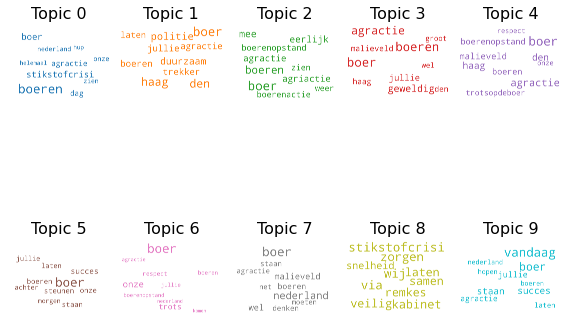

In [47]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = topic_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(8,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [16]:
# # Compute Perplexity
# # a measure of how good the model is. lower the better
# base_perplexity = topic_model.log_perplexity(corpus)

In [17]:
# print('\nPerplexity: ', base_perplexity)

In [18]:
# # Compute Coherence Score
# coherence_model = CoherenceModel(model=topic_model, texts=df['tokenized_tweets'].tolist(), 
#                                    dictionary=id2word, coherence='c_v')


# coherence_lda_model_base = coherence_model.get_coherence()
# print('\nCoherence Score: ', coherence_lda_model_base)

In [19]:
# print('\nCoherence Score: ', coherence_lda_model_base)

In [20]:
version_number = "12_test_all"

# Load tokenized tweets for Coherence Score
grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))

In [21]:
df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

# df_grid = df_grid.pivot("num_topics", "time_window", "average_coherence")
# ax = sns.heatmap(df_grid.astype(float))
# df_grid


In [22]:
version_number = '14_pos'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

# df_grid_14_pos = df_grid.pivot("num_topics", "time_window", "average_coherence")
# ax = sns.heatmap(df_grid_14_pos.astype(float))
# df_grid_14_pos

In [23]:
version_number = '14_neg'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

# df_grid_14_neg = df_grid.pivot("num_topics", "time_window", "average_coherence")
# ax = sns.heatmap(df_grid_14_neg.astype(float))
# df_grid_14_neg

In [24]:
version_number = '15'
senti = '_all'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number + senti, 'rb'))
# corpus = pickle.load(open('corpusses/corpus_V' + version_number + senti, 'rb'))

df_grid_15_all = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid_15_all = df_grid[1:]

In [25]:
version_number = '15_pos'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

# df_grid_15_pos = df_grid.pivot("num_topics", "time_window", "average_coherence")
# ax = sns.heatmap(df_grid_15_pos.astype(float))
# df_grid_15_pos

In [26]:
version_number = '15_neg'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]

# df_grid_15_neg = df_grid.pivot("num_topics", "time_window", "average_coherence")
# ax = sns.heatmap(df_grid_15_neg.astype(float))
# df_grid_15_neg

In [27]:
# Merge dfs of run 14 and 15
frames_pos = [df_grid_14_pos, df_grid_15_pos]
frames_neg = [df_grid_14_neg, df_grid_15_neg]
frames_all = [df_grid_13_all, df_grid_15_all]

df_pos = pd.concat(frames_pos).sort_values(by=['num_topics'])
df_neg = pd.concat(frames_neg).sort_values(by=['num_topics'])
df_all = pd.concat(frames_all).sort_values(by=['num_topics'])

df_all

NameError: name 'df_grid_14_pos' is not defined

In [ ]:
ax = sns.heatmap(df_pos.astype(float))
ax.set(title = "Coherence scores positive tweets")
ax.invert_yaxis()

In [ ]:
ax = sns.heatmap(df_neg.astype(float))
ax.set(title = "Coherence scores negative tweets")
ax.invert_yaxis()

In [ ]:
ax = sns.heatmap(df_all.astype(float))
ax.set(title = "Coherence scores all tweets")
ax.invert_yaxis()


In [ ]:
version_number = '24_all'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]
df_grid = df_grid.pivot("num_topics", "time_window", "average_coherence")

ax = sns.heatmap(df_grid.astype(float))
ax.set(title = "Coherence scores all tweets")
ax.invert_yaxis()

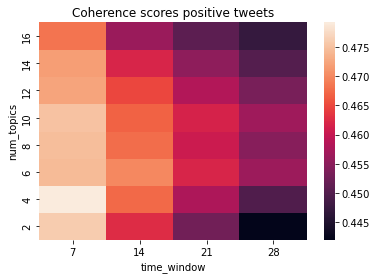

In [6]:
version_number = '27_pos'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]
df_grid = df_grid.pivot("num_topics", "time_window", "average_coherence")

ax = sns.heatmap(df_grid.astype(float))
ax.set(title = "Coherence scores positive tweets")
ax.invert_yaxis()

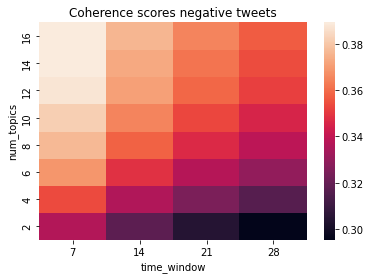

In [5]:
version_number = '27_neg'

grid = pickle.load(open(grid_dir + 'grid_V' + version_number, 'rb'))


df_grid = pd.DataFrame(grid, columns =['time_window', 'num_topics', 'average_coherence'])
df_grid = df_grid[1:]
df_grid = df_grid.pivot("num_topics", "time_window", "average_coherence")

ax = sns.heatmap(df_grid.astype(float))
ax.set(title = "Coherence scores negative tweets")
ax.invert_yaxis()

In [29]:
pd.DataFrame(grid)

,0,1,2
0,time_window,num_topics,average_coherence
1,7,2,0.369
2,14,2,0.345083
3,21,2,0.32968
4,28,2,0.318205
5,7,4,0.386199
6,14,4,0.366577
7,21,4,0.351596
8,28,4,0.340011
9,7,6,0.398138


C:\Users\mila1\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Users\mila1\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


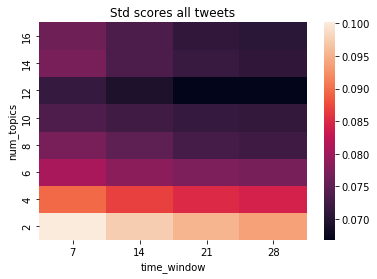

In [51]:
version_number = '25_all'

grid_std = pickle.load(open(grid_dir + 'grid_std_V' + version_number, 'rb'))
grid_std

df_grid_std = pd.DataFrame(grid_std, columns =['time_window', 'num_topics', 'std_coherence'])
df_grid_std = df_grid_std[1:]
df_grid_std = df_grid_std.pivot("num_topics", "time_window", "std_coherence")
df_grid_std
ax1 = sns.heatmap(df_grid_std.astype(float))
ax1.set(title = "Std scores all tweets")
ax1.invert_yaxis()

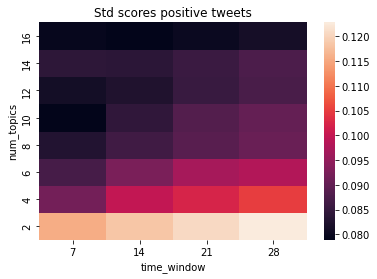

In [7]:
version_number = '27_pos'

grid_std = pickle.load(open(grid_dir + 'grid_std_V' + version_number, 'rb'))
grid_std

df_grid_std = pd.DataFrame(grid_std, columns =['time_window', 'num_topics', 'std_coherence'])
df_grid_std = df_grid_std[1:]
df_grid_std = df_grid_std.pivot("num_topics", "time_window", "std_coherence")
df_grid_std
ax1 = sns.heatmap(df_grid_std.astype(float))
ax1.set(title = "Std scores positive tweets")
ax1.invert_yaxis()

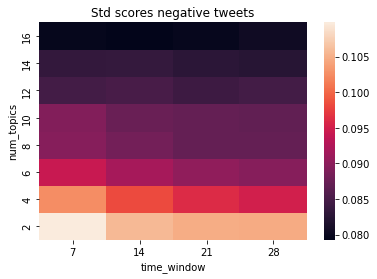

In [8]:
version_number = '27_neg'

grid_std = pickle.load(open(grid_dir + 'grid_std_V' + version_number, 'rb'))
grid_std

df_grid_std = pd.DataFrame(grid_std, columns =['time_window', 'num_topics', 'std_coherence'])
df_grid_std = df_grid_std[1:]
df_grid_std = df_grid_std.pivot("num_topics", "time_window", "std_coherence")
df_grid_std
ax1 = sns.heatmap(df_grid_std.astype(float))
ax1.set(title = "Std scores negative tweets")
ax1.invert_yaxis()